<a href="https://colab.research.google.com/github/krishnasharma1386/Friends_Hack/blob/main/zerotopandas_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1vttuDReodYVryJc0-vrX9gOSMFxd3y_b')

# India-air-quality

***This analysis includes the air quality index of various cities in India over the years.[Data Analysis with Python: Zero to Pandas](zerotopandas.com).***

## Downloading the Dataset

**TODO** - add some explanation here

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

In [ ]:
!pip install kaggle

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/rohanrao/air-quality-data-in-india' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: krishnasharma1386
Your Kaggle Key: ········


  5%|▌         | 4.00M/72.9M [00:00<00:02, 34.1MB/s]

100%|██████████| 72.9M/72.9M [00:00<00:00, 95.3MB/s]


The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './air-quality-data-in-india'

In [ ]:
import os
os.listdir(data_dir)

['station_hour.csv',
 'city_hour.csv',
 'stations.csv',
 'station_day.csv',
 'city_day.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "India-air-quality" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "krishnasharma1386/india-air-quality" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/krishnasharma1386/india-air-quality


'https://jovian.ml/krishnasharma1386/india-air-quality'

## Data Preparation and Cleaning

*Here we are importing data as indair_df.*

*Then we clone orignial data so orignial data didn't affet.*


> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [ ]:
import numpy as np
import pandas as pd
indair_df = pd.read_csv(data_dir + '/city_day.csv')

In [ ]:
indair_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
clone_df = indair_df[['City','AQI','Date','AQI_Bucket']]
clone_df

,City,AQI,Date,AQI_Bucket
0,Ahmedabad,NaN,2015-01-01,NaN
1,Ahmedabad,NaN,2015-01-02,NaN
2,Ahmedabad,NaN,2015-01-03,NaN
3,Ahmedabad,NaN,2015-01-04,NaN
4,Ahmedabad,NaN,2015-01-05,NaN
...,...,...,...,...
29526,Visakhapatnam,41.0,2020-06-27,Good
29527,Visakhapatnam,70.0,2020-06-28,Satisfactory
29528,Visakhapatnam,68.0,2020-06-29,Satisfactory
29529,Visakhapatnam,54.0,2020-06-30,Satisfactory


In [ ]:
clone_df['Date'] = pd.to_datetime(clone_df['Date'])
clone_df['Year'] = pd.DatetimeIndex(clone_df.Date).year
clone_df['Month'] = pd.DatetimeIndex(clone_df.Date).month
clone_df['Day'] = pd.DatetimeIndex(clone_df.Date).day
clone_df['Weekday'] = pd.DatetimeIndex(clone_df.Date).weekday


<ipython-input-14-098044cffd81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clone_df['Date'] = pd.to_datetime(clone_df['Date'])
<ipython-input-14-098044cffd81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clone_df['Year'] = pd.DatetimeIndex(clone_df.Date).year
<ipython-input-14-098044cffd81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
clone_df.columns

Index(['City', 'AQI', 'Date', 'AQI_Bucket', 'Year', 'Month', 'Day', 'Weekday'], dtype='object')

In [ ]:
clone_df.shape

(29531, 8)

In [ ]:
clone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   AQI         24850 non-null  float64       
 2   Date        29531 non-null  datetime64[ns]
 3   AQI_Bucket  24850 non-null  object        
 4   Year        29531 non-null  int64         
 5   Month       29531 non-null  int64         
 6   Day         29531 non-null  int64         
 7   Weekday     29531 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 1.8+ MB


In [ ]:
clone_df.describe()

,AQI,Year,Month,Day,Weekday
count,24850.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,166.463581,2017.887914,6.267143,15.762758,2.998747
std,140.696585,1.533783,3.431974,8.804537,2.000110
min,13.000000,2015.000000,1.000000,1.000000,0.000000
25%,81.000000,2017.000000,3.000000,8.000000,1.000000
50%,118.000000,2018.000000,6.000000,16.000000,3.000000
75%,208.000000,2019.000000,9.000000,23.000000,5.000000
max,2049.000000,2020.000000,12.000000,31.000000,6.000000


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "krishnasharma1386/india-air-quality" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/krishnasharma1386/india-air-quality


'https://jovian.ml/krishnasharma1386/india-air-quality'

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [ ]:
clone_df.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
clone_df.AQI_Bucket.unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

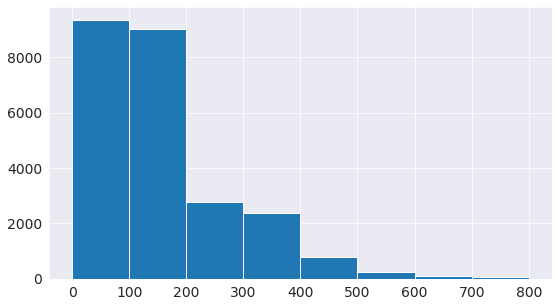

In [ ]:
plt.hist(clone_df.AQI,bins=np.arange(0,900,100));

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [ ]:
sev_df  =clone_df[clone_df['AQI_Bucket']== "Severe"].groupby("City", as_index=False).count()[['Date', 'City']]
sev_df

,Date,City
0,638,Ahmedabad
1,7,Amritsar
2,6,Chennai
3,239,Delhi
4,95,Gurugram
5,5,Guwahati
6,7,Hyderabad
7,2,Jaipur
8,18,Jorapokhar
9,13,Kolkata


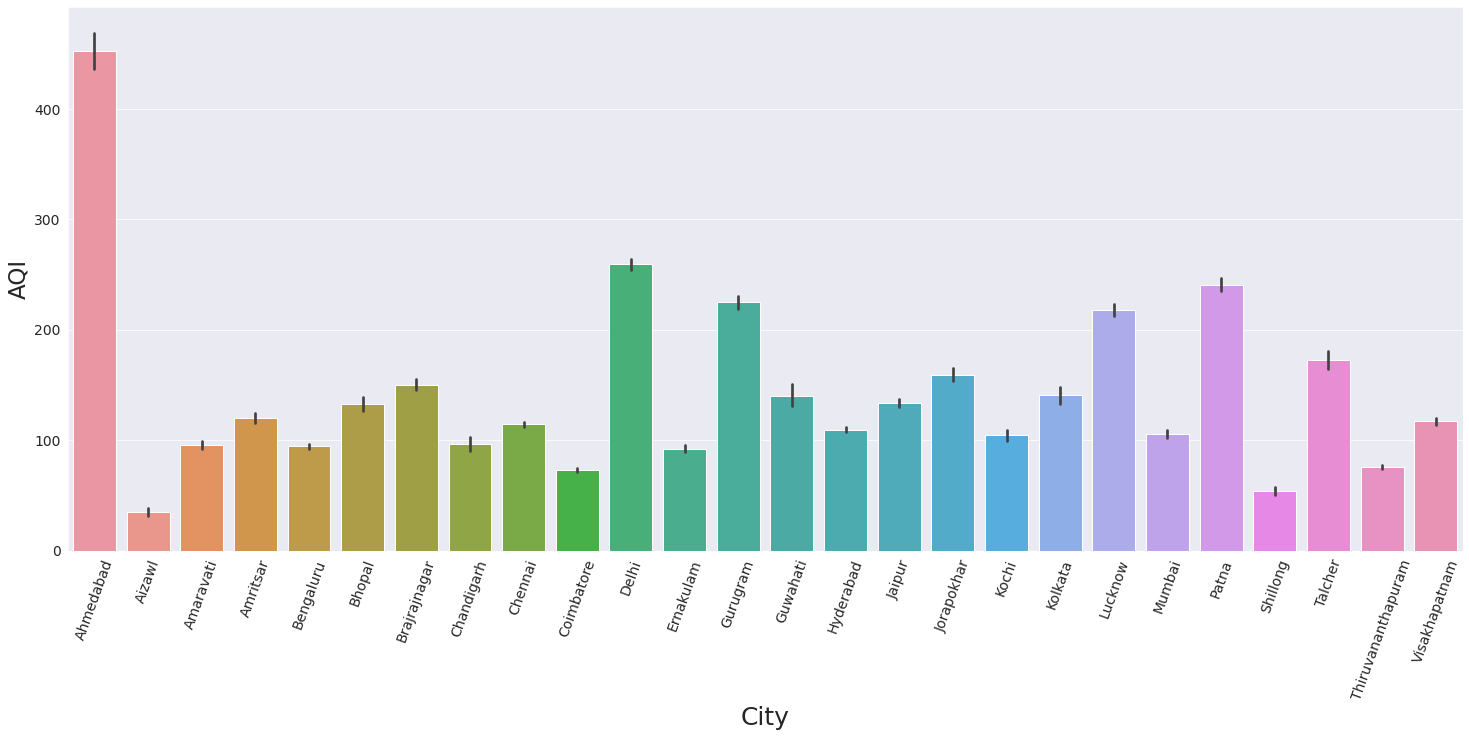

In [ ]:
plt.figure(figsize=(25,10))
plt.xlabel('Cities',size=25)
plt.xticks(rotation=70)
plt.ylabel('AQI',size=23)
sns.barplot('City','AQI', data=clone_df);

Here Aizawl has the least AQI average while Ahmedabad has the highest.

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "krishnasharma1386/india-air-quality" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/krishnasharma1386/india-air-quality


'https://jovian.ml/krishnasharma1386/india-air-quality'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1:  Which are top 10 city had the minimum days of 'severe' air quality in India?

In [ ]:
less_df =  sev_df.sort_values('Date', ascending = True).head(10)
less_df

,Date,City
7,2,Jaipur
5,5,Guwahati
2,6,Chennai
1,7,Amritsar
6,7,Hyderabad
9,13,Kolkata
8,18,Jorapokhar
12,24,Talcher
4,95,Gurugram
10,110,Lucknow


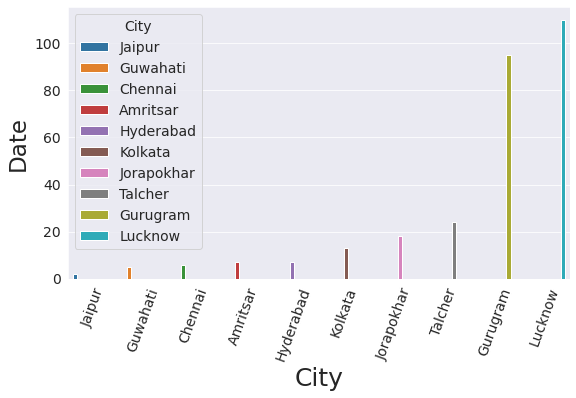

In [ ]:
plt.xlabel('Cities',size=25)
plt.xticks(rotation=70)
plt.ylabel('Date',size=23)
sns.barplot('City', 'Date', hue='City', data=less_df);

***As we can see above Jaipur is minimum days of 'severe' air quality in India.***

***so lets go! to Jaipur, after Covid.***

#### Q2: On which day Jaipur had the worst air quality?

In [ ]:
jaipur_df = clone_df[clone_df.City == "Jaipur"]
jaipur_df

,City,AQI,Date,AQI_Bucket,Year,Month,Day,Weekday
16587,Jaipur,NaN,2017-06-14,NaN,2017,6,14,2
16588,Jaipur,NaN,2017-06-15,NaN,2017,6,15,3
16589,Jaipur,NaN,2017-06-16,NaN,2017,6,16,4
16590,Jaipur,NaN,2017-06-17,NaN,2017,6,17,5
16591,Jaipur,NaN,2017-06-18,NaN,2017,6,18,6
...,...,...,...,...,...,...,...,...
17696,Jaipur,89.0,2020-06-27,Satisfactory,2020,6,27,5
17697,Jaipur,75.0,2020-06-28,Satisfactory,2020,6,28,6
17698,Jaipur,69.0,2020-06-29,Satisfactory,2020,6,29,0
17699,Jaipur,79.0,2020-06-30,Satisfactory,2020,6,30,1


In [ ]:
jaipur_df['AQI'].max()
print("Jaipur's worst air quaity index: {}" .format(jaipur_df['AQI'].max()))

Jaipur's worst air quaity index: 457.0


In [ ]:
jaipur_df.loc[jaipur_df['AQI'].idxmax()]

City                       Jaipur
AQI                           457
Date          2019-04-08 00:00:00
AQI_Bucket                 Severe
Year                         2019
Month                           4
Day                             8
Weekday                         0
Name: 17250, dtype: object

***On 8th April 2019 Jaipur had the worst air quality which was :457***

#### Q3:  Which city had the most days of 'severe' air quality?

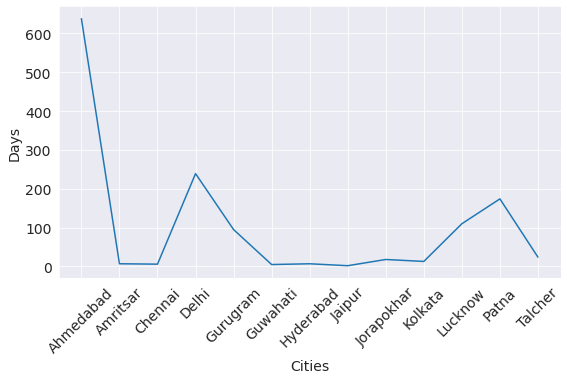

In [ ]:
plt.xlabel('Cities')
plt.ylabel('Days')
plt.xticks(rotation=45)
plt.plot(sev_df.City,sev_df.Date);

***Here Ahmedabad,Delhi and Patna had the most number of days of severe air quality***

#### Q4: How did AQI differ for the three cities with most days of air quality over the last three years?

In [ ]:
delhi_df = clone_df[clone_df.City=='Delhi']
patna_df = clone_df[clone_df.City=='Patna']
ahmedabad_df = clone_df[clone_df.City == "Ahmedabad"]

In [ ]:
delhi2018 = delhi_df[delhi_df['Year']==2018]
delhi2019 = delhi_df[delhi_df['Year']==2019]
delhi2020 = delhi_df[delhi_df['Year']==2020]
patna2018 = patna_df[patna_df['Year']==2018]
patna2019 = patna_df[patna_df['Year']==2019]
patna2020 = patna_df[patna_df['Year']==2020]
ahmedabad2018 = ahmedabad_df[ahmedabad_df['Year']==2018]
ahmedabad2019 = ahmedabad_df[ahmedabad_df['Year']==2019]
ahmedabad2020 = ahmedabad_df[ahmedabad_df['Year']==2020]

In [ ]:
delhi_last3 = [delhi2018.AQI.mean(), delhi2019.AQI.mean(), delhi2020.AQI.mean()]
patna_last3 = [patna2018.AQI.mean(), patna2019.AQI.mean(), patna2020.AQI.mean()]
ahmedabad_last3 = [ahmedabad2018.AQI.mean(), ahmedabad2019.AQI.mean(), ahmedabad2020.AQI.mean()]

In [ ]:
years = [2018,2019,2020]
years

[2018, 2019, 2020]

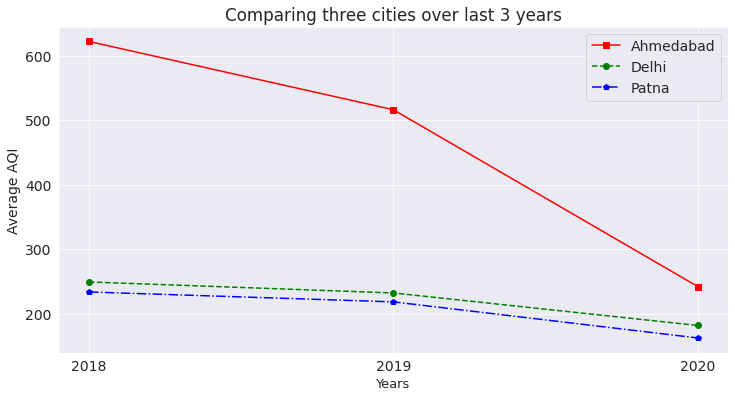

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.plot(years, ahmedabad_last3, 's-r')
plt.plot(years, delhi_last3, 'o--g')
plt.plot(years, patna_last3, 'p-.b')

plt.xlabel('Years', size=13)
plt.ylabel('Average AQI')
plt.xticks(np.arange(2018,2021,1))

plt.title('Comparing three cities over last 3 years')
plt.legend(['Ahmedabad', 'Delhi', 'Patna']);

***Here we can see that Ahmedabad, Delhi and Patna have reduced their AQI in the last three years.***

#### Q5: How does air quality change from all cities over the years?

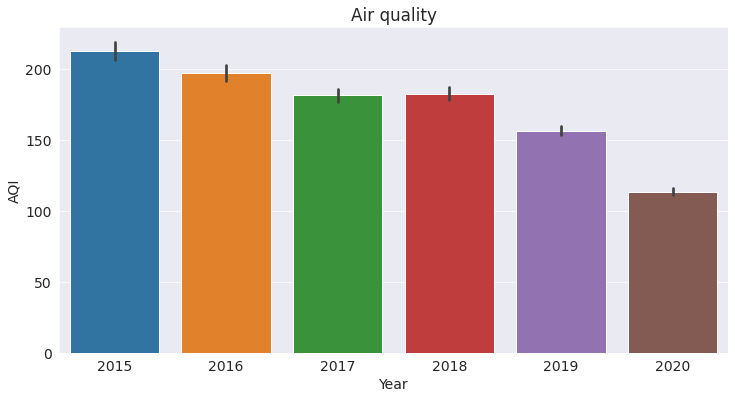

In [ ]:
sns.barplot('Year', 'AQI', data=clone_df).set_title("Air quality");

***We can see a very interesting fact here. The air quality index has been exceptionally low in the year 2020, this may be due to lockdown that was put in place to deal with the Covid epidemic.***

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "krishnasharma1386/india-air-quality" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/krishnasharma1386/india-air-quality


'https://jovian.ml/krishnasharma1386/india-air-quality'

## Inferences and Conclusion

***- From the above, we can say that air pollution in Jaipur is less than other cities in India, and due to COVID, we can see that the lockdown has reduced air pollution due to fewer human activities.***

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()